In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]= (10,2)
import warnings
warnings.filterwarnings("ignore")

null , duplicate, special character, len

In [171]:
lst = ['washing_machine',"ac1",'ac2',"fridge",'tv']
path = "d:/NILM/Data_files/Parquet/Appliances12_06-21_06/"
l = []
for i in range(len(lst)):
    df = pd.read_parquet(f"{path}{lst[i]}.parquet")
    print(f"no of records in {lst[i]}:",len(df))
    df.set_index(['timestamp'],inplace=True ,drop=True)
    print(f"null in {lst[i]}:",df.isna().sum().sum())
    print(f"duplicates in {lst[i]}:",df.duplicated().sum())
    df.drop_duplicates(inplace=True)
    l.append(df)


no of records in washing_machine: 2847
null in washing_machine: 0
duplicates in washing_machine: 52
no of records in ac1: 46207
null in ac1: 0
duplicates in ac1: 266
no of records in ac2: 20213
null in ac2: 0
duplicates in ac2: 69
no of records in fridge: 646625
null in fridge: 0
duplicates in fridge: 5815
no of records in tv: 127913
null in tv: 0
duplicates in tv: 509


# washing machine

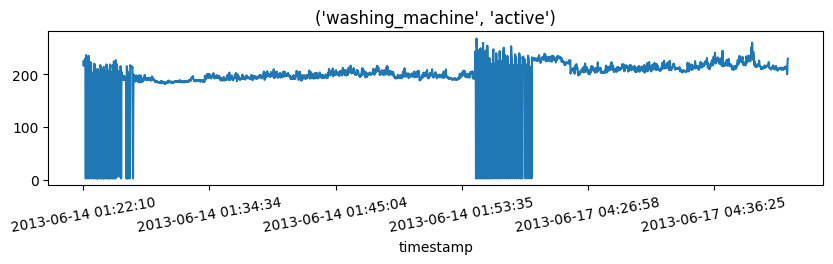

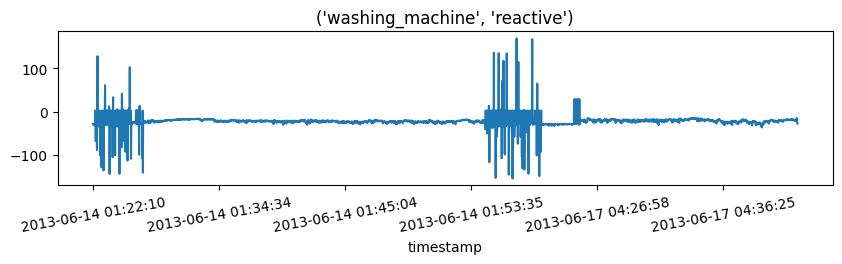

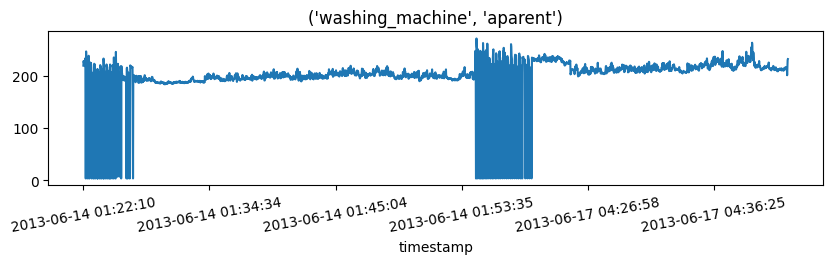

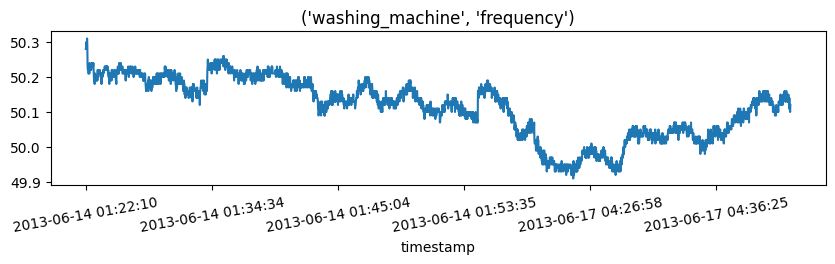

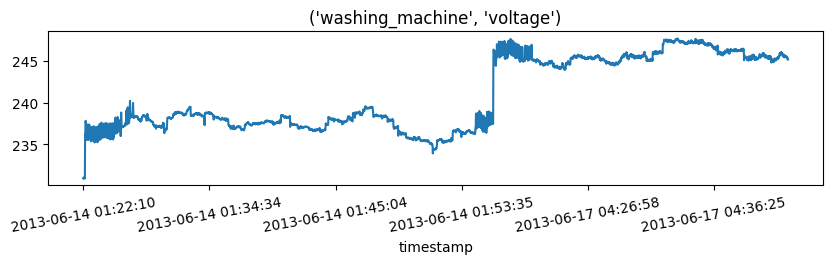

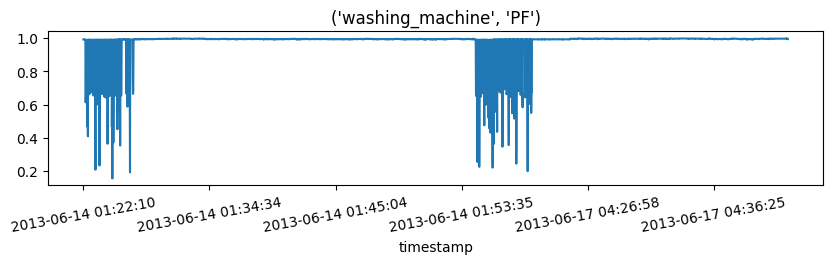

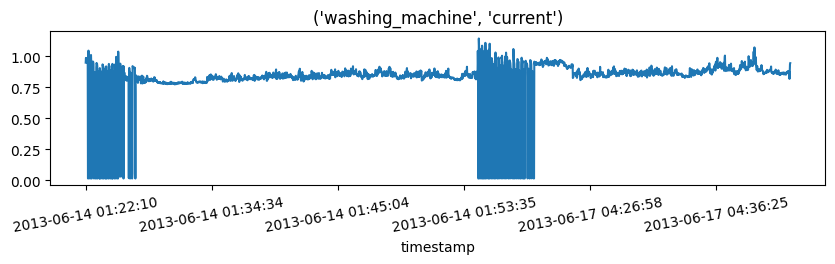

2795


In [172]:
x=0 # washing machine
df= l[x]
for i in df.columns:
    df[i].plot()
    plt.title((lst[x],i))
    plt.xticks(rotation=10)
    plt.show()
print(len(df))    

In [173]:
df[df['frequency']>51]

,active,reactive,aparent,frequency,voltage,PF,current
timestamp,,,,,,,


active power derived with (v*i*PF) and (aparent -reactive)

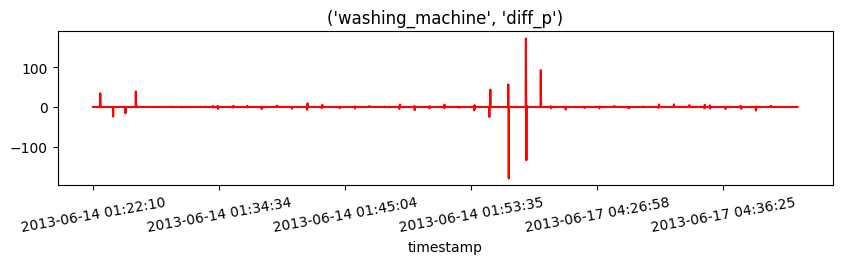

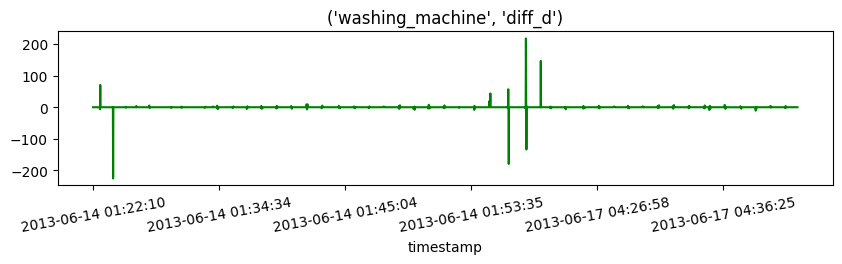

In [174]:
df["power"] = ((df['PF'])*(df['voltage'])*(df['current'])).round(3)
df['derived'] = (np.sqrt((np.square(df['aparent'])-np.square(df['reactive']))).round(3))
df['diff_p'] = df['active']- df['power']
df['diff_d']= df['active']- df['derived']

df['diff_p'].plot(c="r")
plt.title((lst[x],"diff_p"))
plt.xticks(rotation=10)
plt.show()
df['diff_d'].plot(c='g')
plt.title((lst[x],"diff_d"))
plt.xticks(rotation=10)
plt.show()

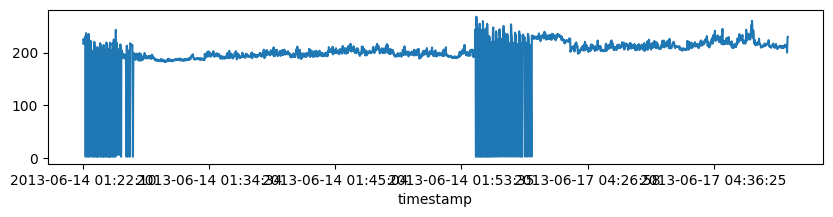

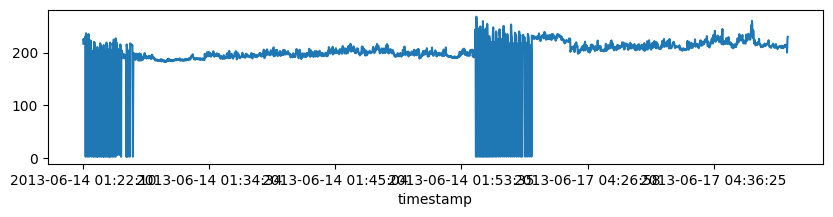

In [175]:
df['power'].plot()
plt.show()
df['active'].plot()
plt.show()

,active,reactive,aparent,frequency,voltage,PF,current,power,derived,diff_p,diff_d
timestamp,,,,,,,,,,,


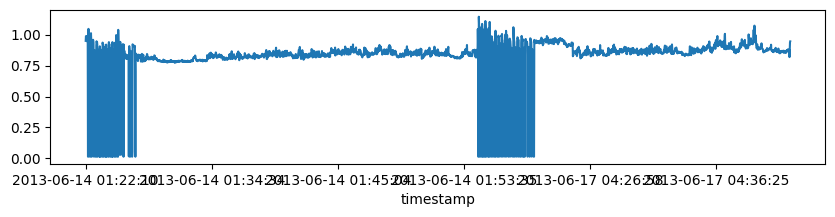

In [176]:
df['current'].plot()
df[df['current']>1.5]

active power greator than apparent power

In [177]:
df[df['active']>df['aparent']]

,active,reactive,aparent,frequency,voltage,PF,current,power,derived,diff_p,diff_d
timestamp,,,,,,,,,,,
2013-06-14 01:22:54,223.126,-100.661,182.785,50.23,235.60,0.835,0.958,188.464,152.570,34.662,70.556
2013-06-14 01:25:59,215.714,-28.279,213.600,50.22,237.42,0.991,0.900,211.755,211.720,3.959,3.994
2013-06-14 01:26:54,198.863,-26.869,195.227,50.20,237.88,0.992,0.844,199.165,193.369,-0.302,5.494
2013-06-14 01:26:55,188.824,-22.756,186.888,50.20,237.94,0.994,0.799,188.973,185.497,-0.149,3.327
2013-06-14 01:28:54,185.823,-19.668,185.794,50.20,237.07,0.994,0.784,184.748,184.750,1.075,1.073
...,...,...,...,...,...,...,...,...,...,...,...
2013-06-17 04:39:32,215.263,-21.484,214.554,50.15,245.39,0.995,0.882,215.352,213.476,-0.089,1.787
2013-06-17 04:39:33,214.270,-20.661,211.746,50.16,245.68,0.996,0.876,214.355,210.736,-0.085,3.534
2013-06-17 04:39:35,212.160,-18.603,210.193,50.14,245.64,0.996,0.856,209.427,209.368,2.733,2.792


In [178]:
df_wm = df[['power']]
len(df_wm)

2795

# ac1

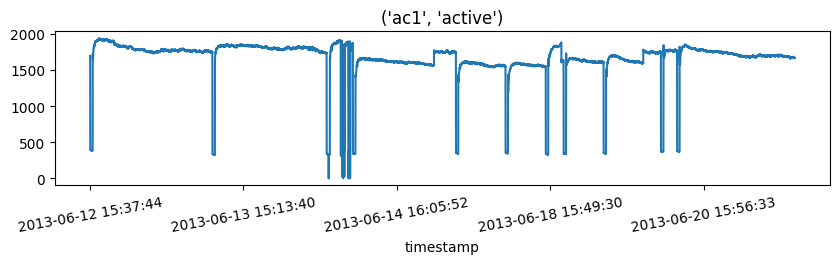

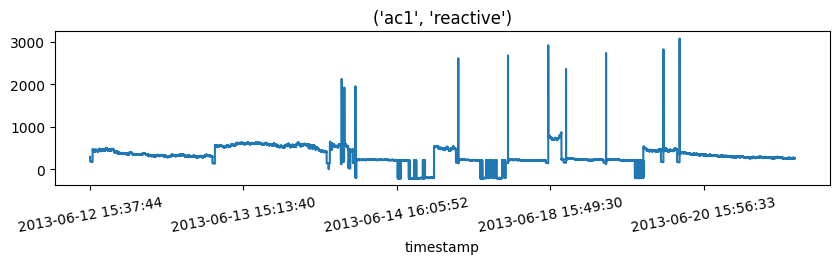

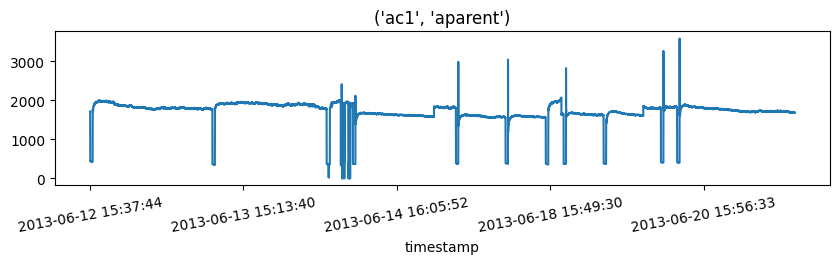

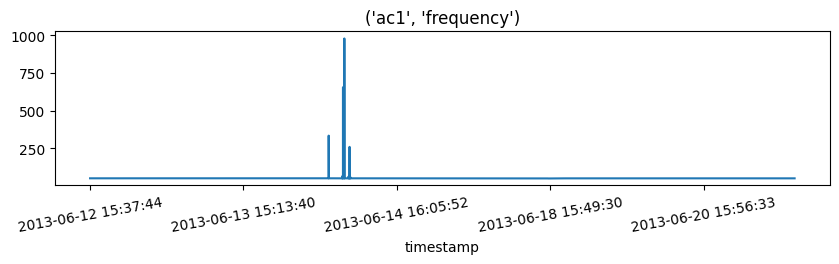

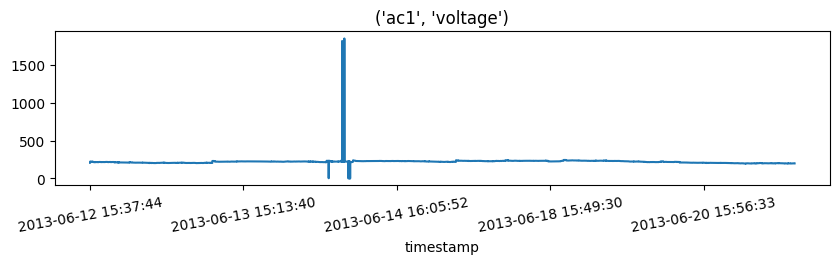

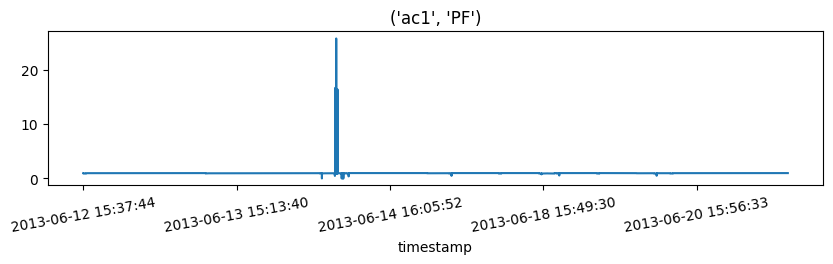

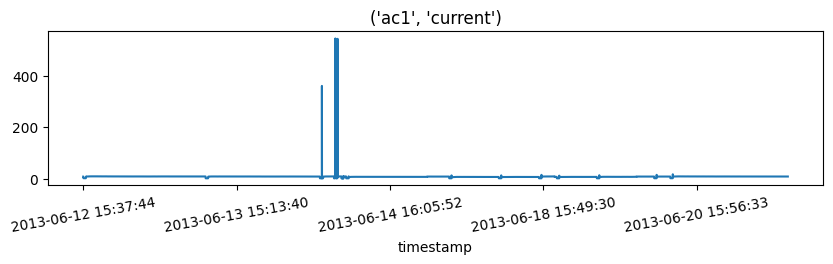

45941


In [179]:
x=1 # ac1
df= l[x]
for i in df.columns:
    df[i].plot()
    plt.title((lst[x],i))
    plt.xticks(rotation=10)
    plt.show()
print(len(df))

In [180]:
df[df['frequency']>51]


,active,reactive,aparent,frequency,voltage,PF,current
timestamp,,,,,,,
2013-06-14 08:25:59,0.000,0.928,21.936,333.57,3.27,0.000,359.618
2013-06-14 08:46:04,31.028,1896.602,0.958,63.00,1817.03,16.655,543.600
2013-06-14 08:47:05,2.085,417.158,0.901,655.00,375.88,25.702,180.919
2013-06-14 08:48:35,23.994,1928.036,0.960,979.00,1850.22,16.334,542.235
2013-06-14 08:58:00,1.814,24.802,0.000,61.00,0.00,0.000,0.908
2013-06-14 08:59:11,1.807,24.434,0.000,259.00,0.00,0.000,0.910
2013-06-14 08:59:48,8.546,13.651,0.000,61.00,0.00,0.000,0.972


<Axes: xlabel='timestamp'>

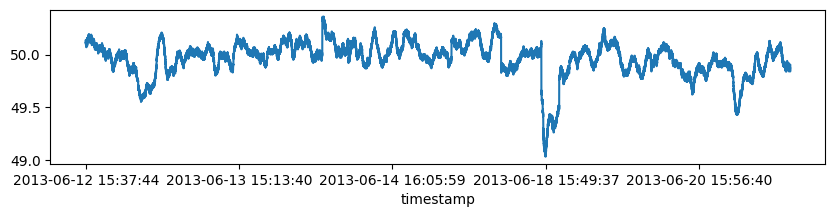

In [181]:
df = df.drop(df[df['frequency'] > 51].index)
df['frequency'].plot()

,active,reactive,aparent,frequency,voltage,PF,current
timestamp,,,,,,,
2013-06-14 08:45:33,1127.657,2131.146,2411.098,50.01,225.67,0.468,10.684
2013-06-15 16:30:45,1433.437,2618.347,2985.043,50.12,232.98,0.480,12.812
2013-06-17 16:41:07,1433.967,2683.770,3042.841,49.87,235.47,0.905,12.922
2013-06-18 15:47:25,1656.040,2925.303,1720.588,49.18,225.05,0.755,14.937
2013-06-18 16:21:54,1541.906,2365.881,2823.981,49.86,238.80,0.546,11.826
2013-06-19 16:11:24,1507.244,2742.112,1148.635,50.09,232.59,0.899,13.453
2013-06-19 17:18:15,1626.395,2829.516,3263.636,50.04,217.69,0.498,14.992
2013-06-20 15:30:11,1821.928,3084.509,3582.404,49.91,209.63,0.949,17.089


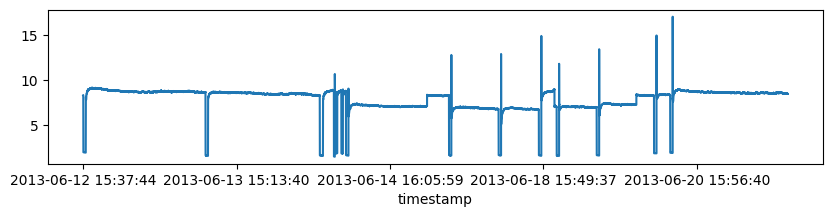

In [182]:
df['current'].plot()
df[df['current']>10]

<Axes: xlabel='timestamp'>

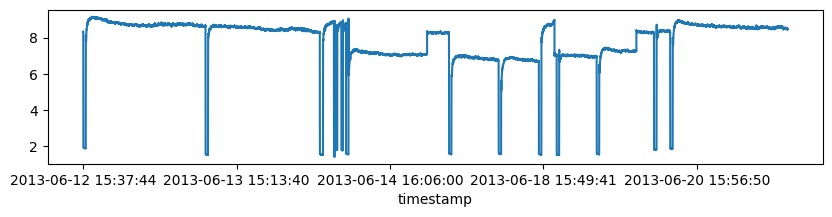

In [183]:
df = df.drop(df[df['current']>10].index)
df['current'].plot()

,active,reactive,aparent,frequency,voltage,PF,current
timestamp,,,,,,,
2013-06-14 15:20:27,808.411,1957.437,2117.802,50.13,233.94,0.382,9.053


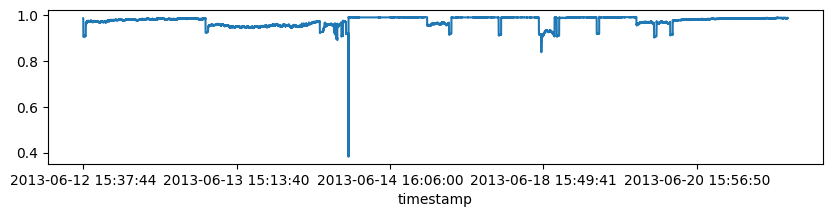

In [184]:
df['PF'].plot()
df[df['PF']< 0.7]

<Axes: xlabel='timestamp'>

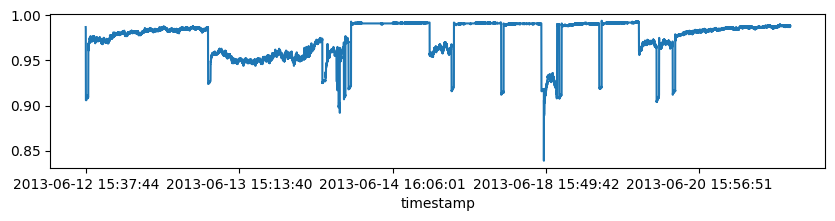

In [185]:
df = df.drop(df[df['PF']<0.7].index)
df['PF'].plot()

<Axes: xlabel='timestamp'>

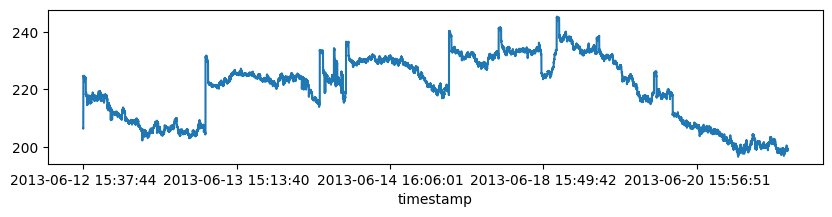

In [186]:
df['voltage'].plot()

In [187]:
df[df['active']>df['aparent']]


,active,reactive,aparent,frequency,voltage,PF,current
timestamp,,,,,,,
2013-06-17 16:41:11,1325.911,185.884,1319.786,49.88,237.0,0.99,5.572


In [188]:
# active power derived with (v*i*PF) and (aparent -reactive)

df["power"] = ((df['PF'])*(df['voltage'])*(df['current'])).round(3)
df['derived'] = (np.sqrt((np.square(df['aparent']))-(np.square(df['reactive']))).round(3))
df['diff_P'] = df['active']- df['power']
df['diff_D']= df['active']- df['derived']


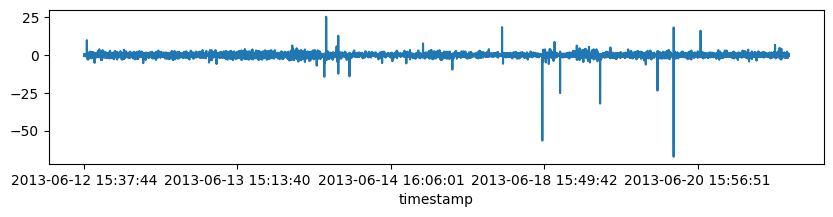

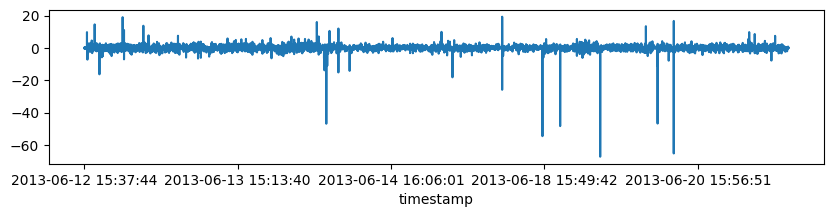

In [189]:
df['diff_P'].plot()
plt.show()
df['diff_D'].plot()
plt.show()

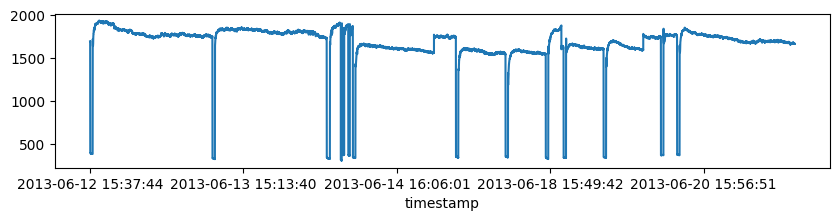

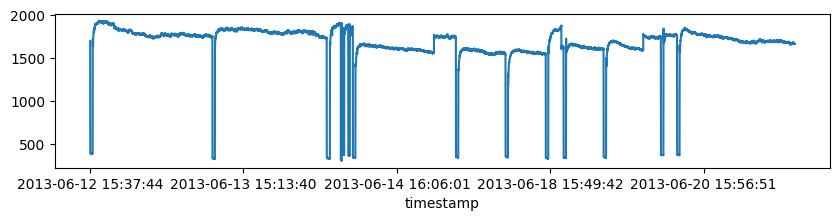

In [190]:
df['active'].plot()
plt.show()
df['power'].plot()
plt.show()


In [191]:
df_ac1 = df[["power"]]
len(df_ac1)

45925

# ac2


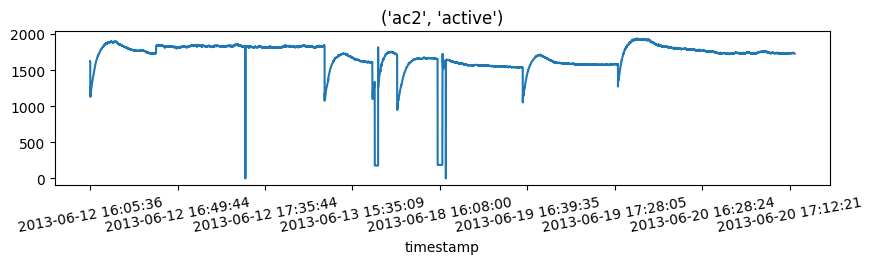

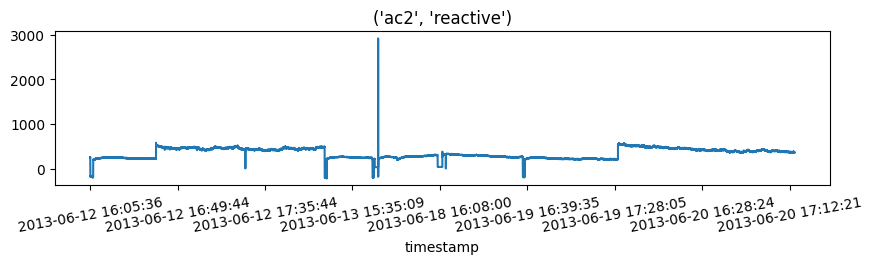

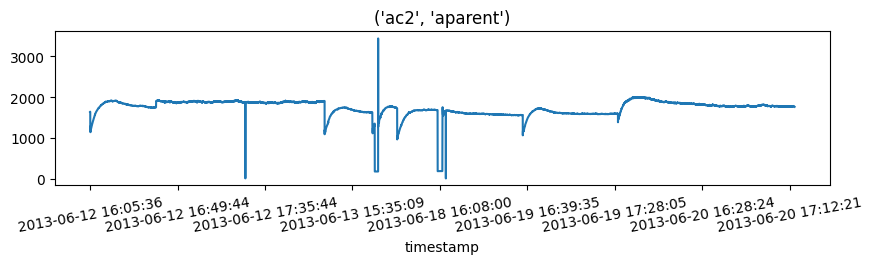

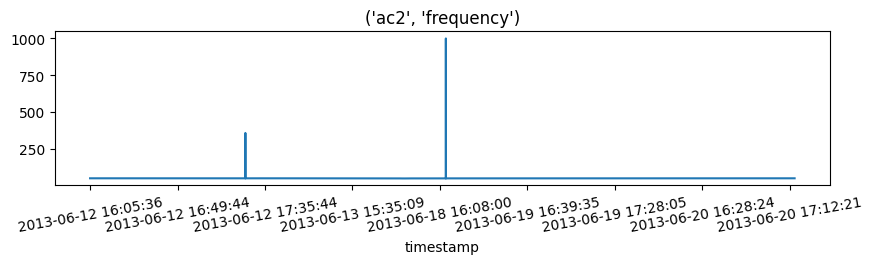

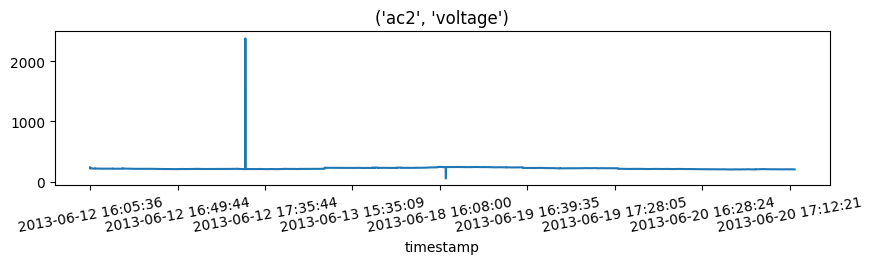

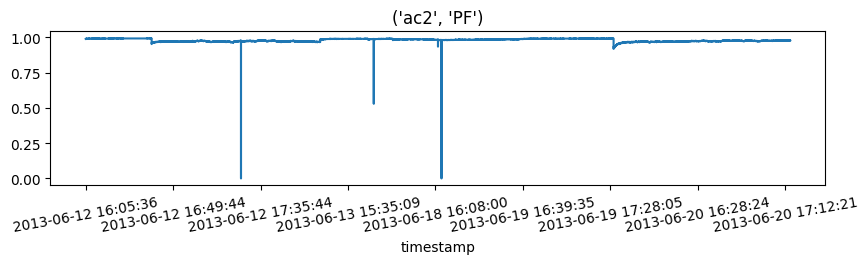

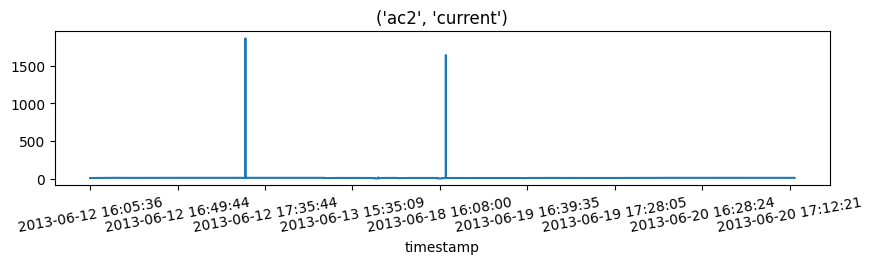

20144


In [192]:
x=2 # ac2
df= l[x]
for i in df.columns:
    df[i].plot()
    plt.title((lst[x],i))
    plt.xticks(rotation=10)
    plt.show()
print(len(df))

In [193]:
df[df['frequency']>51]

,active,reactive,aparent,frequency,voltage,PF,current
timestamp,,,,,,,
2013-06-12 17:25:16,0.356,0.974,13.175,358.00,2378.21,0.0,1865.463
2013-06-18 16:12:33,0.007,0.981,11.269,999.99,52.39,0.0,1644.445


<Axes: xlabel='timestamp'>

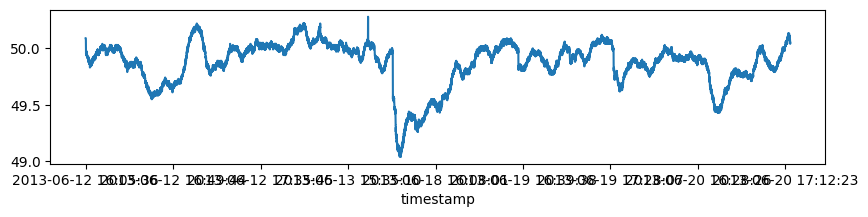

In [194]:
df = df.drop(df[df['frequency']>51].index)
df['frequency'].plot()

,active,reactive,aparent,frequency,voltage,PF,current
timestamp,,,,,,,
2013-06-14 09:41:03,1816.221,2917.353,3436.511,50.0,226.55,0.529,15.169


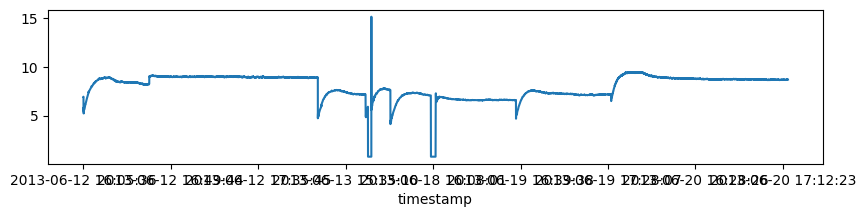

In [195]:
df['current'].plot()
df[df['current']>10]

<Axes: xlabel='timestamp'>

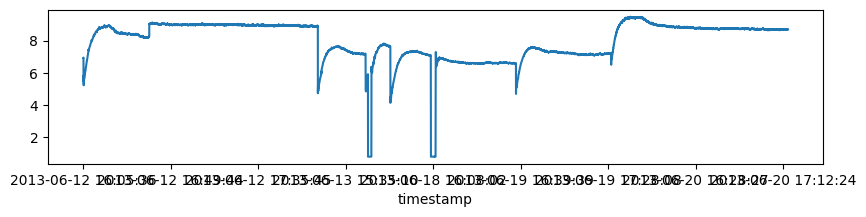

In [196]:
df = df.drop(df[df['current']>10].index)
df['current'].plot()

<Axes: xlabel='timestamp'>

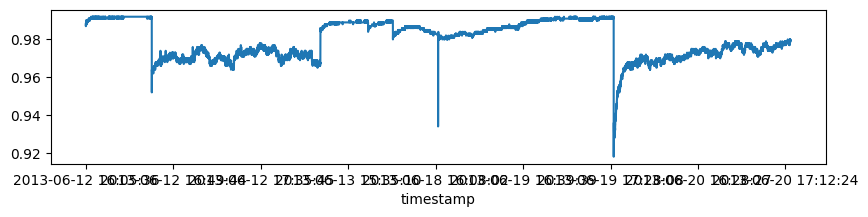

In [197]:
df['PF'].plot()

244.53

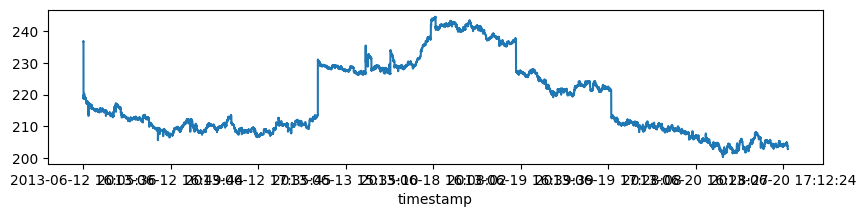

In [198]:
df['voltage'].plot()
df['voltage'].max()

In [199]:
df["power"] = (df['voltage']*df['current']*df['PF']).round(2)
df['derived'] = (np.sqrt(np.square(df['aparent'])-np.square(df['reactive']))).round()
df['diff_p'] = df['active'] - df['power']
df['diff_d'] = df['active']- df['derived']


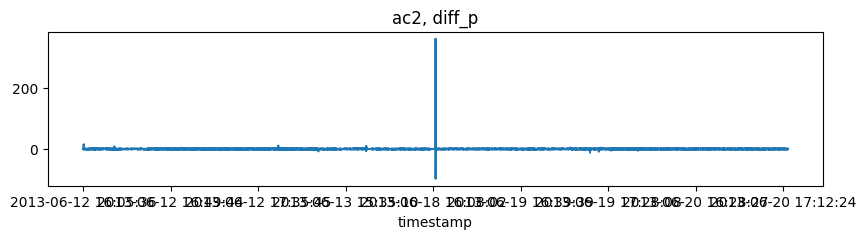

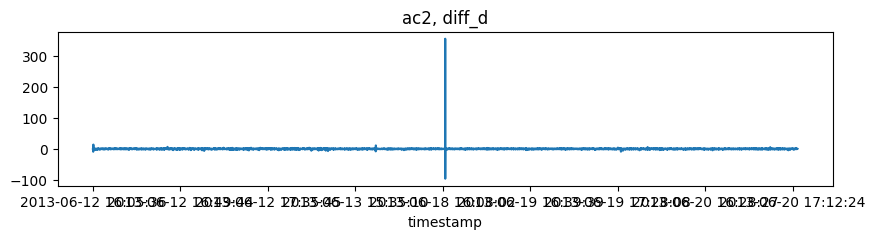

In [200]:
df['diff_p'].plot()
plt.title('ac2, diff_p')
plt.show()
df['diff_d'].plot()
plt.title('ac2, diff_d')
plt.show()

In [201]:
df[df['active']>df['aparent']]

,active,reactive,aparent,frequency,voltage,PF,current,power,derived,diff_p,diff_d
timestamp,,,,,,,,,,,
2013-06-12 16:05:48,1253.135,-177.956,1251.711,49.98,219.67,0.990,5.691,1237.64,1239.0,15.495,14.135
2013-06-18 16:09:22,1345.193,377.880,1059.767,49.47,240.88,0.934,4.379,985.20,990.0,359.993,355.193


In [202]:
df[df['diff_d']<-10]

,active,reactive,aparent,frequency,voltage,PF,current,power,derived,diff_p,diff_d
timestamp,,,,,,,,,,,
2013-06-18 16:09:23,1126.109,248.700,1247.027,49.47,241.74,0.980,5.163,1223.14,1222.0,-97.031,-95.891
2013-06-18 16:09:24,1286.999,261.823,1355.730,49.45,241.41,0.981,5.616,1330.00,1330.0,-43.001,-43.001
2013-06-18 16:09:25,1365.280,272.022,1421.762,49.47,241.46,0.982,5.889,1396.36,1395.0,-31.080,-29.720


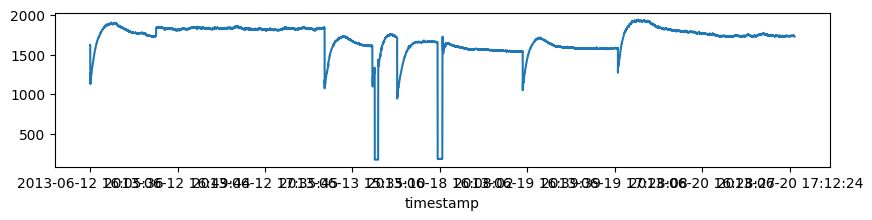

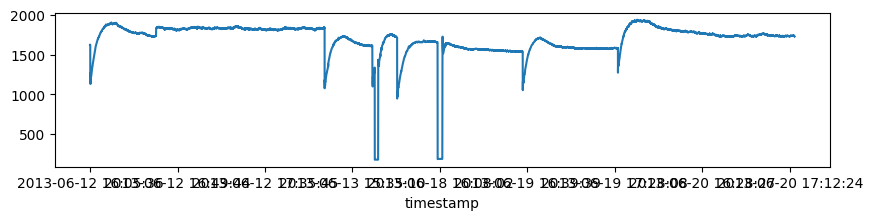

In [203]:
df['power'].plot()
plt.show()
df['active'].plot()
plt.show()

In [204]:
df_ac2 = df[['power']]
print(len(df_ac2))

20141


# fridge

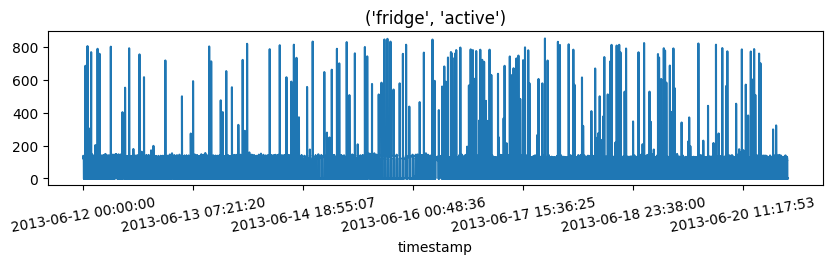

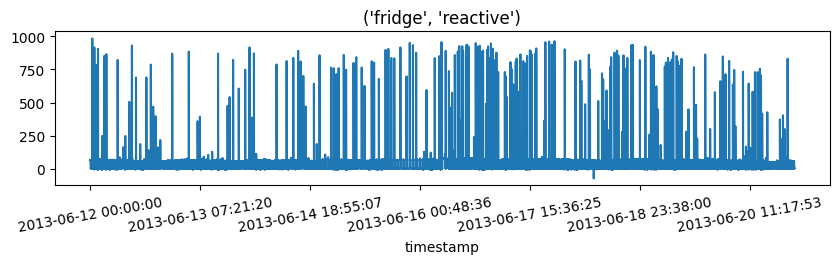

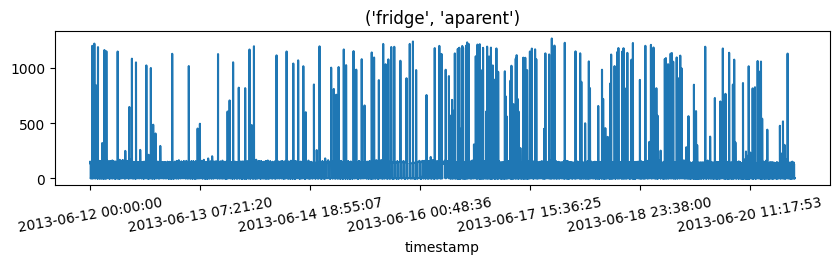

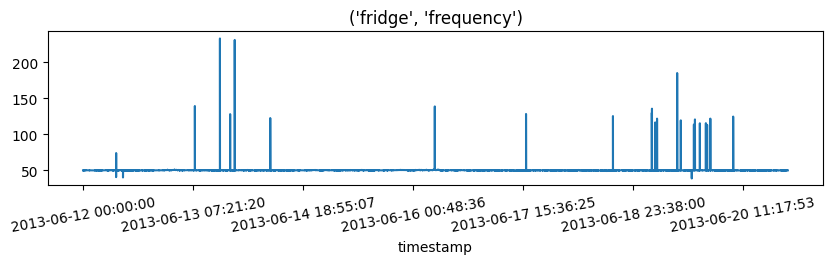

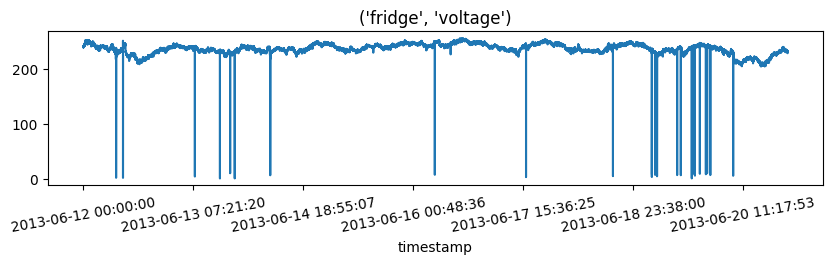

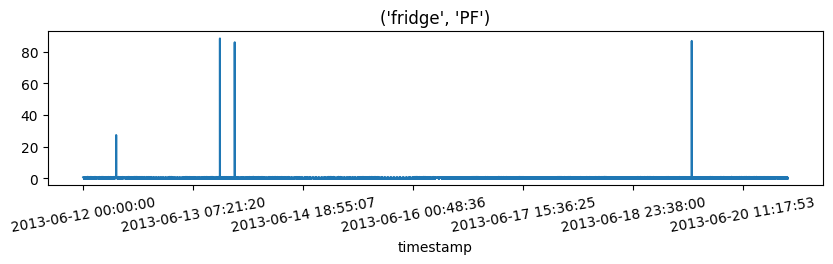

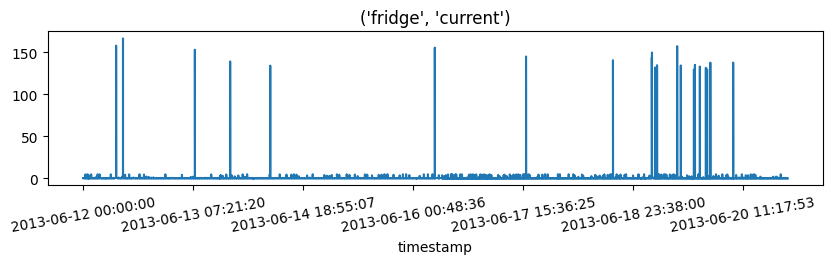

640810


In [213]:
x=3 # fridge
df= l[x]
for i in df.columns:
    df[i].plot()
    plt.title((lst[x],i))
    plt.xticks(rotation=10)
    plt.show()
print(len(df))

In [214]:
df[df['frequency']>51]

,active,reactive,aparent,frequency,voltage,PF,current
timestamp,,,,,,,
2013-06-12 10:45:41,4.807,162.469,0.888,74.00,144.23,27.408,74.790
2013-06-13 07:49:58,0.000,0.908,24.791,139.24,3.58,0.000,153.234
2013-06-13 15:13:11,0.029,2.498,0.028,232.95,0.07,88.405,2.497
2013-06-13 18:48:18,0.001,0.918,23.306,127.98,9.56,0.000,139.345
2013-06-13 20:18:14,0.004,2.544,0.070,230.89,0.18,85.980,2.538
2013-06-14 08:46:01,0.000,0.912,24.147,122.54,5.90,0.000,134.291
2013-06-16 07:55:34,0.001,0.890,27.075,138.67,6.76,0.000,155.742
2013-06-16 07:56:36,0.001,0.887,27.536,135.56,9.10,0.000,152.796
2013-06-17 16:34:11,0.000,0.883,27.993,128.21,2.53,0.000,145.196


<Axes: xlabel='timestamp'>

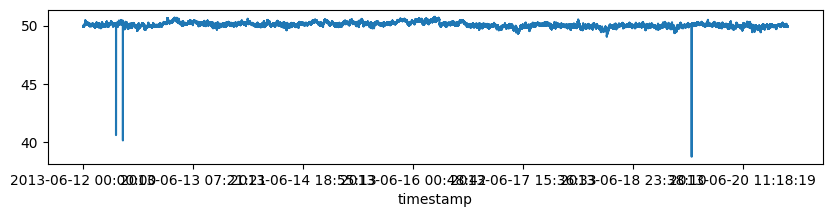

In [215]:
df = df.drop(df[df['frequency']>51].index)
df['frequency'].plot()

In [216]:
df[df['frequency']<49]

,active,reactive,aparent,frequency,voltage,PF,current
timestamp,,,,,,,
2013-06-12 10:44:57,0.0,0.889,27.251,40.60,1.30,0.000,158.151
2013-06-12 12:36:40,0.0,0.841,32.761,40.14,1.17,0.000,166.650
2013-06-19 19:36:54,0.0,2.560,0.055,38.74,0.14,86.835,2.556


<Axes: xlabel='timestamp'>

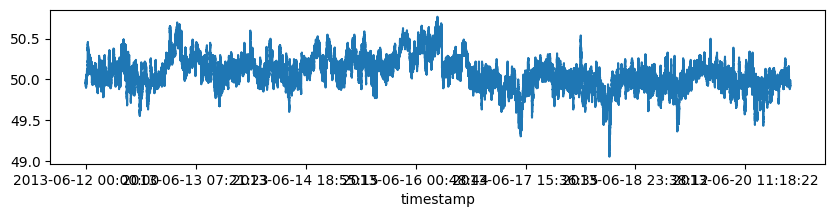

In [217]:
df = df.drop(df[df['frequency']<49].index)
df['frequency'].plot()

,active,reactive,aparent,frequency,voltage,PF,current
timestamp,,,,,,,
2013-06-12 00:09:18,0.164,2.400,2.405,49.96,241.72,0.068,0.010
2013-06-12 00:09:19,0.191,2.549,2.556,49.99,241.71,0.075,0.011
2013-06-12 00:09:20,0.135,2.660,2.664,49.99,241.79,0.051,0.011
2013-06-12 00:09:21,0.210,2.655,2.663,50.00,241.73,0.079,0.011
2013-06-12 00:09:22,0.152,2.517,2.522,50.02,241.96,0.060,0.010
...,...,...,...,...,...,...,...
2013-06-20 23:59:55,0.114,2.553,2.555,49.97,231.94,0.045,0.011
2013-06-20 23:59:56,0.168,2.482,2.488,49.96,232.04,0.067,0.011
2013-06-20 23:59:58,0.178,2.481,2.488,49.96,232.00,0.072,0.011


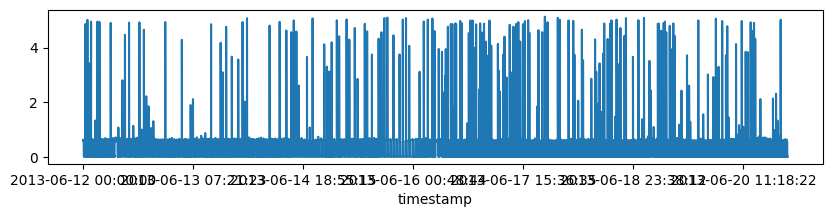

In [218]:
df['current'].plot()
df[df['current']<0.1]

<Axes: xlabel='timestamp'>

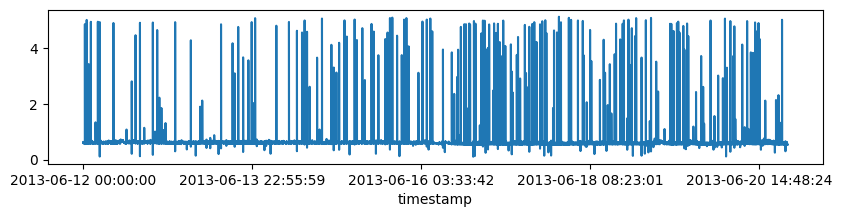

In [219]:
df = df.drop(df[df['current']<0.1].index)
df['current'].plot()

<Axes: xlabel='timestamp'>

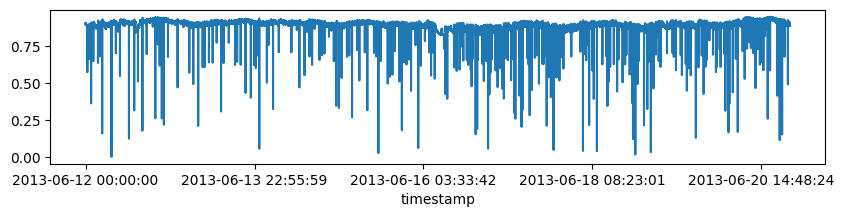

In [220]:
df['PF'].plot()

In [221]:
df[df['PF']<0.1]

,active,reactive,aparent,frequency,voltage,PF,current
timestamp,,,,,,,
2013-06-12 05:56:16,144.838,64.437,158.525,50.05,238.76,0.000,0.664
2013-06-14 01:03:01,6.088,112.934,113.098,50.30,237.19,0.054,0.477
2013-06-15 13:04:46,1.216,49.470,49.485,49.95,240.61,0.025,0.206
2013-06-16 01:58:15,7.563,128.720,128.943,50.46,243.93,0.059,0.529
2013-06-17 01:25:54,22.614,2.472,2.476,50.17,248.62,0.054,0.241
2013-06-17 18:54:42,7.745,2.365,2.368,49.94,241.90,0.045,0.142
2013-06-18 05:27:35,2.675,69.058,69.110,49.92,227.63,0.039,0.304
2013-06-18 10:04:45,2.843,-73.810,73.865,49.92,232.68,0.038,0.317
2013-06-18 20:21:41,0.491,31.683,31.687,50.08,242.98,0.015,0.130


In [222]:
df[df['PF']<0.25]

,active,reactive,aparent,frequency,voltage,PF,current
timestamp,,,,,,,
2013-06-12 03:57:03,3.953,24.819,25.132,50.10,237.28,0.157,0.106
2013-06-12 05:56:16,144.838,64.437,158.525,50.05,238.76,0.000,0.664
2013-06-12 11:23:27,30.526,247.473,249.349,50.10,231.69,0.122,1.076
2013-06-12 14:06:15,4.627,25.945,26.354,49.98,224.27,0.176,0.118
2013-06-12 19:35:29,87.687,397.092,406.659,50.13,219.91,0.216,1.849
2013-06-13 05:12:34,117.753,31.723,32.435,50.14,234.29,0.208,0.138
2013-06-14 01:03:01,6.088,112.934,113.098,50.30,237.19,0.054,0.477
2013-06-15 13:04:46,1.216,49.470,49.485,49.95,240.61,0.025,0.206
2013-06-15 19:55:58,118.063,28.612,29.084,50.21,241.32,0.179,0.120


<Axes: xlabel='timestamp'>

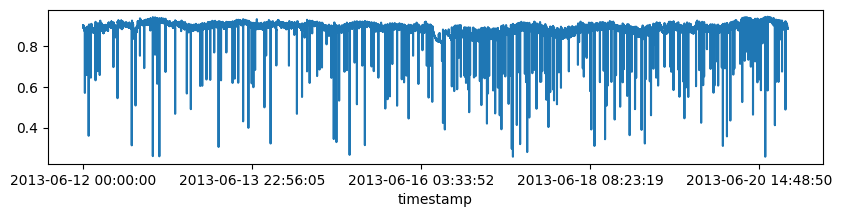

In [223]:
df = df.drop(df[df['PF']<0.25].index)
df['PF'].plot()

In [224]:
df

,active,reactive,aparent,frequency,voltage,PF,current
timestamp,,,,,,,
2013-06-12 00:00:00,127.568,64.403,142.904,49.96,240.02,0.893,0.595
2013-06-12 00:00:01,127.022,64.258,142.350,49.97,240.11,0.892,0.593
2013-06-12 00:00:02,126.745,64.168,142.063,49.96,240.14,0.892,0.592
2013-06-12 00:00:03,126.253,64.183,141.631,49.97,240.10,0.891,0.590
2013-06-12 00:00:04,125.763,64.484,141.331,49.97,240.07,0.890,0.589
...,...,...,...,...,...,...,...
2013-06-20 23:52:07,109.977,57.294,124.104,49.93,231.11,0.887,0.537
2013-06-20 23:52:08,110.065,57.308,124.091,49.91,231.07,0.887,0.537
2013-06-20 23:52:09,109.894,57.317,123.943,49.91,230.97,0.887,0.537


In [225]:
df["power"] = (df['voltage']*df['current']*df['PF']).round(2)
df['derived'] = (np.sqrt(np.square(df['aparent'])-np.square(df['reactive']))).round()
df['diff_p'] = df['active'] - df['power']
df['diff_d'] = df['active']- df['derived']


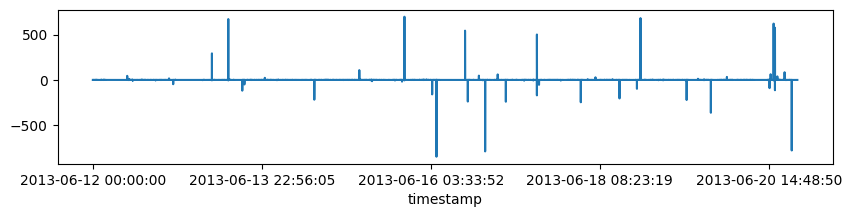

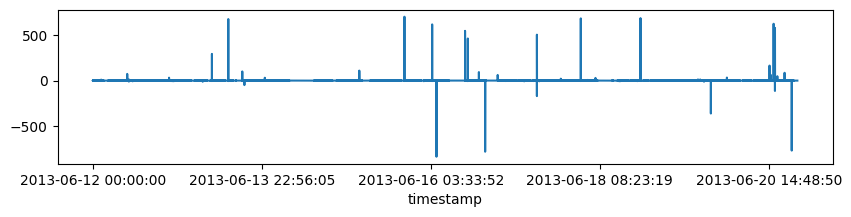

In [226]:
df['diff_p'].plot()
plt.show()
df['diff_d'].plot()
plt.show()

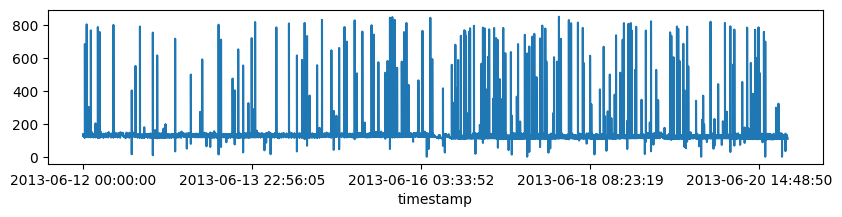

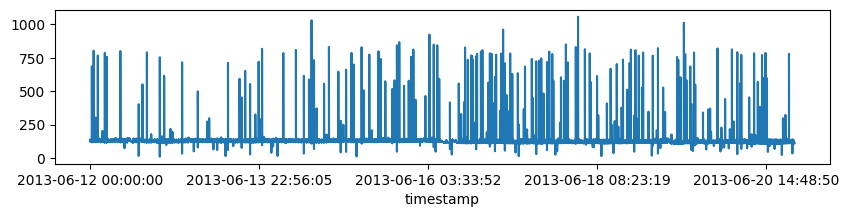

In [227]:
df['active'].plot()
plt.show()
df['power'].plot()
plt.show()

In [229]:
df[df['active']>df['aparent']]

,active,reactive,aparent,frequency,voltage,PF,current,power,derived,diff_p,diff_d
timestamp,,,,,,,,,,,
2013-06-12 08:15:57,117.808,69.399,82.761,50.15,236.18,0.545,0.564,72.60,45.0,45.208,72.808
2013-06-12 18:33:45,113.604,65.816,105.479,49.72,214.59,0.781,0.576,96.53,82.0,17.074,31.604
2013-06-12 20:12:39,170.761,161.620,137.636,50.00,221.91,0.927,1.060,218.05,NaN,-47.289,NaN
2013-06-13 07:19:39,590.947,393.473,494.719,50.11,231.98,0.606,2.116,297.47,300.0,293.477,290.947
2013-06-13 12:03:45,801.794,61.873,145.186,50.21,228.95,0.905,0.624,129.29,131.0,672.504,670.794
2013-06-13 23:47:39,118.075,61.500,106.611,50.19,238.63,0.710,0.558,94.54,87.0,23.535,31.075
2013-06-14 16:24:20,812.550,810.730,146.731,50.16,229.94,0.898,4.992,1030.78,NaN,-218.230,NaN
2013-06-15 04:46:25,119.783,40.865,42.389,49.92,235.82,0.266,0.179,11.23,11.0,108.553,108.783
2013-06-15 18:56:01,831.238,66.787,150.899,50.08,233.76,0.897,0.634,132.94,135.0,698.298,696.238


In [228]:
df[df['diff_p']>20]

,active,reactive,aparent,frequency,voltage,PF,current,power,derived,diff_p,diff_d
timestamp,,,,,,,,,,,
2013-06-12 08:15:57,117.808,69.399,82.761,50.15,236.18,0.545,0.564,72.60,45.0,45.208,72.808
2013-06-13 07:19:39,590.947,393.473,494.719,50.11,231.98,0.606,2.116,297.47,300.0,293.477,290.947
2013-06-13 12:03:45,801.794,61.873,145.186,50.21,228.95,0.905,0.624,129.29,131.0,672.504,670.794
2013-06-13 23:47:39,118.075,61.500,106.611,50.19,238.63,0.710,0.558,94.54,87.0,23.535,31.075
2013-06-15 04:46:25,119.783,40.865,42.389,49.92,235.82,0.266,0.179,11.23,11.0,108.553,108.783
2013-06-15 18:56:01,831.238,66.787,150.899,50.08,233.76,0.897,0.634,132.94,135.0,698.298,696.238
2013-06-16 16:48:56,680.263,83.878,161.406,50.16,236.65,0.854,0.673,136.01,138.0,544.253,542.263
2013-06-16 20:12:23,111.726,75.306,77.766,50.03,248.14,0.476,0.543,64.14,19.0,47.586,92.726
2013-06-17 01:54:19,111.321,73.125,88.813,50.03,245.84,0.568,0.361,50.41,50.0,60.911,61.321


In [231]:
df_f = df[['power']]
print(len(df_f))

208484


# TV

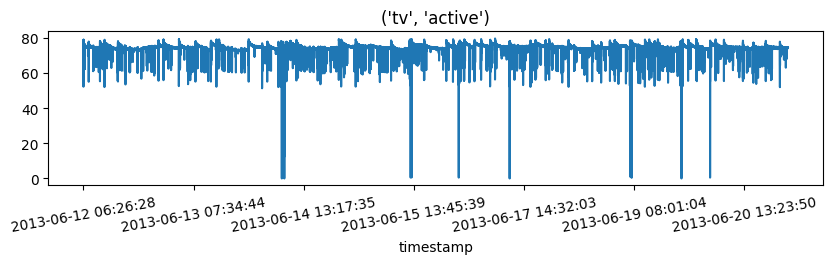

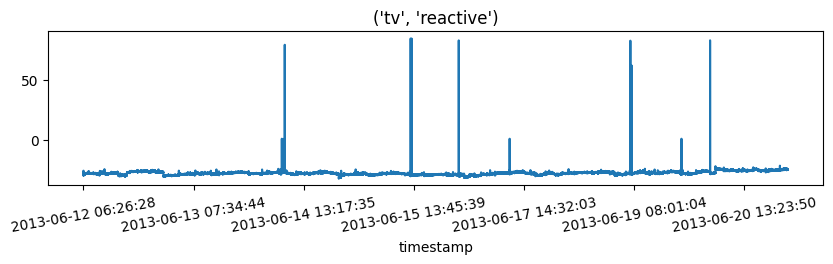

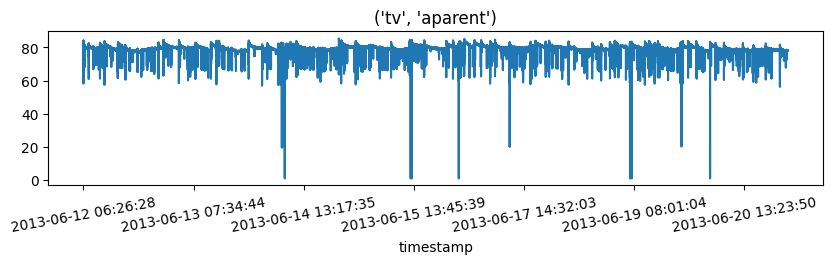

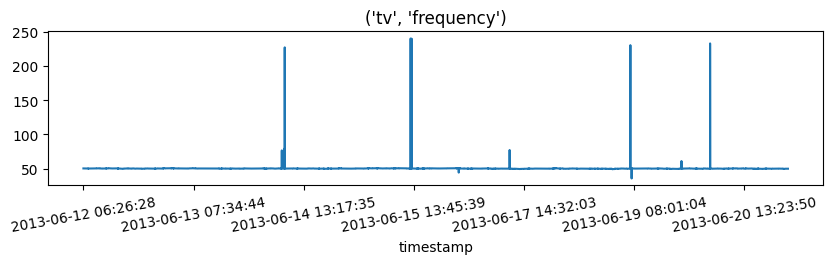

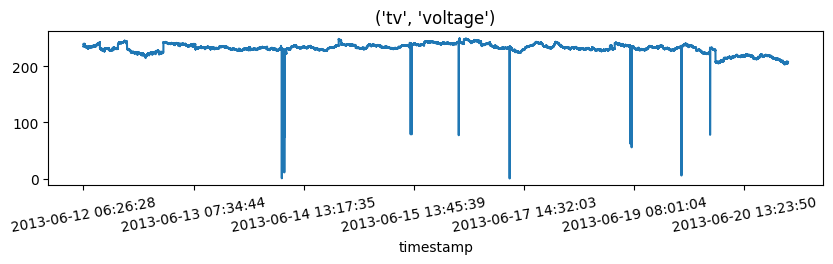

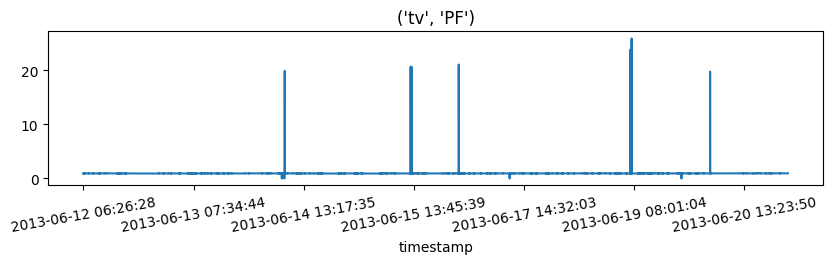

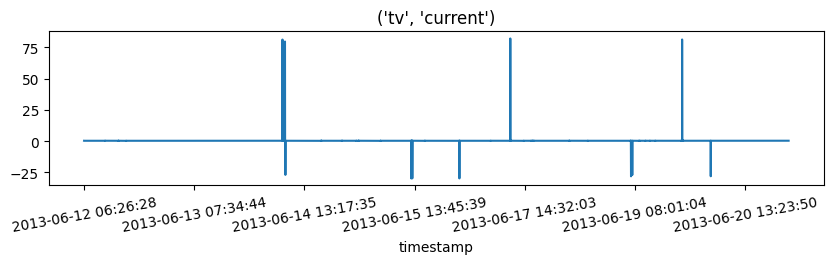

127913


In [85]:
x = 4 # TV
df = l[x]
for i in df.columns:
    df[i].plot()
    plt.title((lst[x],i))
    plt.xticks(rotation=10)
    plt.show()
print(len(df))

In [86]:
df[df['frequency']>51]

,active,reactive,aparent,frequency,voltage,PF,current
timestamp,,,,,,,
2013-06-14 08:33:05,0.000,0.943,19.466,76.55,0.53,0.000,81.194
2013-06-14 08:50:08,0.001,0.941,19.849,79.00,11.01,0.000,79.608
2013-06-14 08:53:02,12.617,79.162,0.940,227.26,74.44,19.880,-26.920
2013-06-15 13:04:31,0.489,84.408,0.936,240.29,78.98,20.660,-29.782
2013-06-15 13:36:04,0.602,84.318,0.936,239.93,78.92,20.610,-29.681
2013-06-17 13:27:54,0.000,0.940,19.918,77.15,0.21,0.000,82.062
2013-06-19 07:08:22,0.944,68.188,0.915,229.70,62.39,23.797,-27.515
2013-06-19 07:08:35,1.222,82.567,0.940,230.49,77.65,19.867,-28.060
2013-06-19 15:17:15,0.000,0.939,20.190,61.00,5.49,0.000,81.253


<Axes: xlabel='timestamp'>

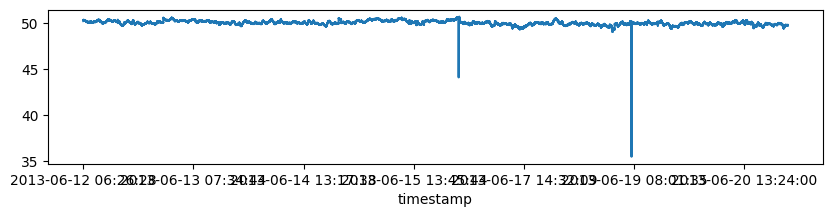

In [87]:
df = df.drop(df[df['frequency']>51].index)
df['frequency'].plot()

In [88]:
df[df['frequency']<49]

,active,reactive,aparent,frequency,voltage,PF,current
timestamp,,,,,,,
2013-06-16 07:29:01,0.492,82.817,0.933,44.11,77.30,21.039,-29.732
2013-06-19 07:13:10,0.364,61.933,0.900,35.51,55.73,25.865,-27.019


<Axes: xlabel='timestamp'>

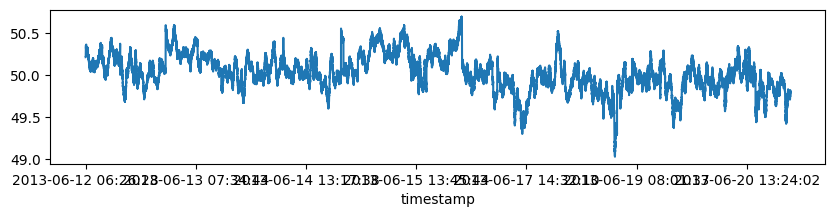

In [89]:
df = df.drop(df[df['frequency']<49].index)
df['frequency'].plot()

<Axes: xlabel='timestamp'>

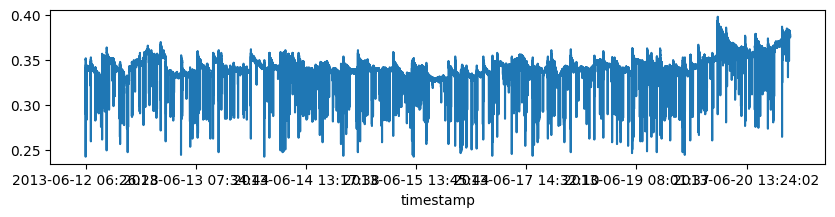

In [90]:
df['current'].plot()

<Axes: xlabel='timestamp'>

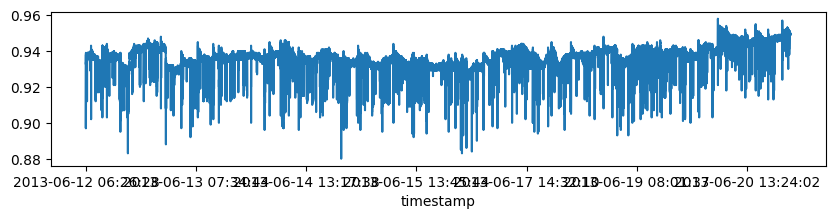

In [91]:
df['PF'].plot()

<Axes: xlabel='timestamp'>

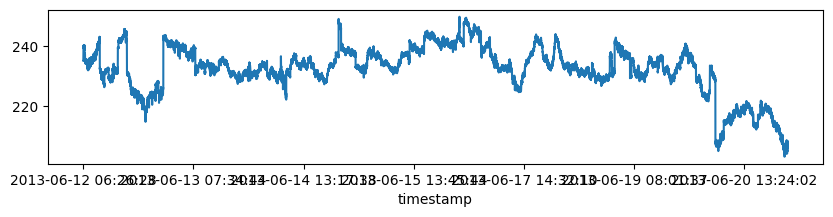

In [92]:

df['voltage'].plot()

In [97]:
print(len(df[df['active']>df['aparent']]))
df[df['active']>df['aparent']]


60


,active,reactive,aparent,frequency,voltage,PF,current
timestamp,,,,,,,
2013-06-12 07:27:23,73.888,-28.273,72.697,50.21,237.78,0.921,0.306
2013-06-12 08:42:59,76.059,-27.828,75.643,50.00,230.61,0.930,0.328
2013-06-12 08:45:02,75.339,-27.378,75.220,49.94,227.86,0.931,0.330
2013-06-12 08:46:02,75.129,-27.121,69.085,50.00,227.78,0.920,0.303
2013-06-12 11:19:39,78.020,-27.935,65.913,50.02,228.13,0.906,0.363
2013-06-12 11:59:31,71.109,-26.824,66.019,50.22,231.67,0.914,0.331
2013-06-12 13:24:35,69.733,-29.816,67.037,50.09,244.70,0.905,0.310
2013-06-12 14:31:52,73.892,-26.910,68.955,50.14,222.58,0.921,0.310
2013-06-12 14:53:06,73.545,-26.151,66.961,49.91,223.79,0.925,0.349


In [101]:
df["power"] = (df['voltage']*df['current']*df['PF']).round(2)
df['derived'] = (np.sqrt(np.square(df['aparent'])-np.square(df['reactive']))).round()
df['diff_p'] = df['active'] - df['power']
df['diff_d'] = df['active']- df['derived']


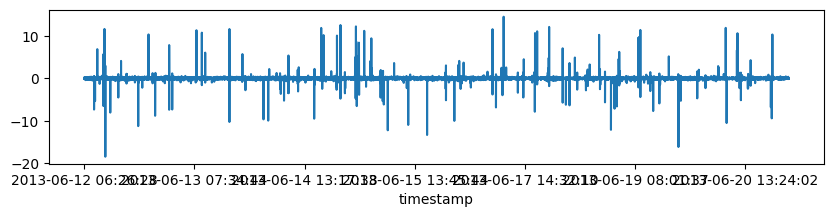

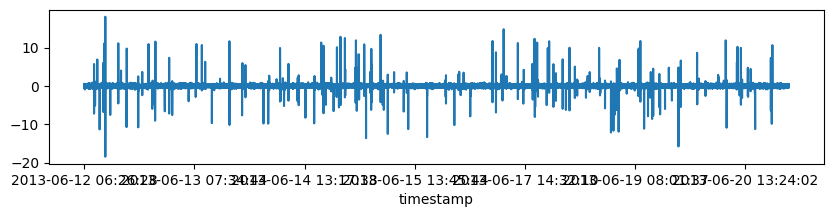

In [102]:
df['diff_p'].plot()
plt.show()
df['diff_d'].plot()
plt.show()

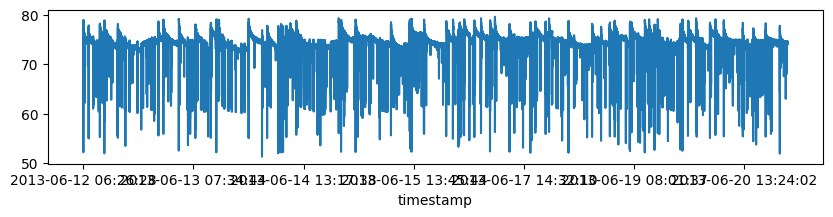

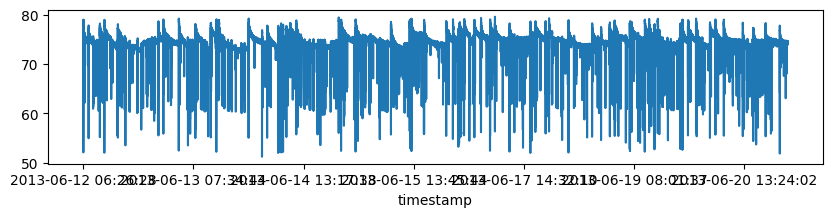

In [103]:
df['active'].plot()
plt.show()
df['power'].plot()
plt.show()

In [105]:
df_tv = df[['power']]
print(len(df_tv))

127901
